## Effective Information as a function of Temperature for 3x3 Lattice. Also TPM Visualization


T =  0.01
T =  0.03
T =  0.1
T =  0.32
T =  1.0
T =  3.16
T =  10.0
T =  31.62
T =  100.0
T =  316.23
T =  1000.0
T =  3162.28
T =  10000.0
T =  31622.78
T =  100000.0


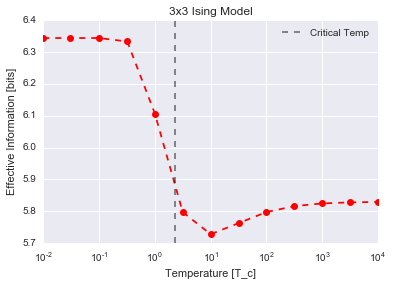

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Create temperature array (this is the same one used in shell_script)
log_spaced = np.logspace(-2,5,15)*100
T_array = []
for each in log_spaced:
    T_array.append(int(round(each)))
T_c = 2.26918531421; # critical temp of ising model (coupling = +1, dimless temperature)

# Get EI
EI_array = []
for T in T_array:
    EI_file = '../SEMI_ANALYTIC/EI_DATA/ANALYTIC_EI_3x3_'+str(T)+'.txt'
    print 'T = ',T/100.
    df = pd.read_table(EI_file,index_col=None)
    EI_array.append(df['EI'][0])
    
T_array = T_array/np.asarray(100.) # scale temperature array to be in units of T_c

# Plot
plt.semilogx(T_array,EI_array,'ro--')
plt.xlabel('Temperature [T_c]')
plt.ylabel('Effective Information [bits]')
plt.title('3x3 Ising Model')
plt.axvline(T_c,color='black',linestyle='--',alpha=0.5,label='Critical Temp')
plt.legend(loc='best')
plt.xlim((0,1e4))
plt.show()

# convert back to original units (and cast as int)
T_array = T_array*100


### Now visualize some of the TPM's

T =  0.01
(512, 512)


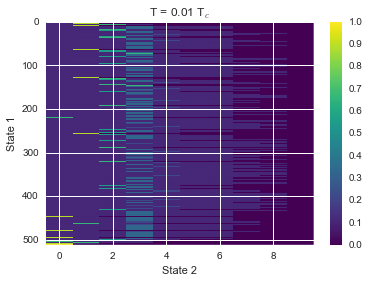

T =  0.03
(512, 512)


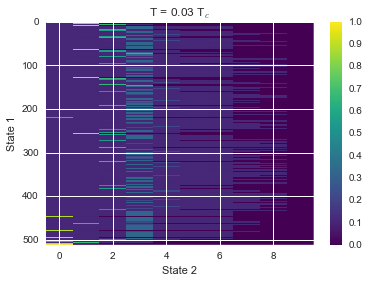

T =  0.1
(512, 512)


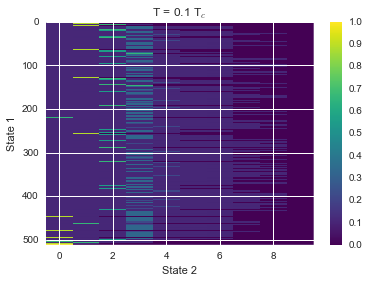

T =  0.32
(512, 512)


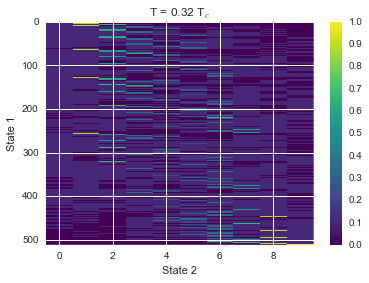

T =  1.0
(512, 512)


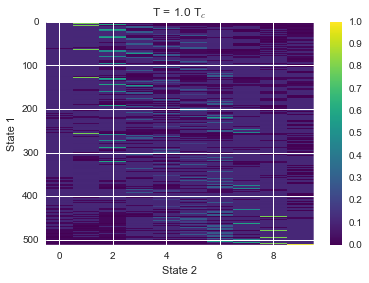

T =  3.16
(512, 512)


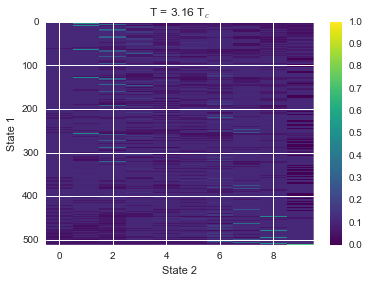

T =  10.0
(512, 512)


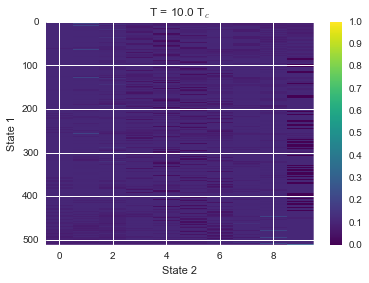

T =  31.62
(512, 512)


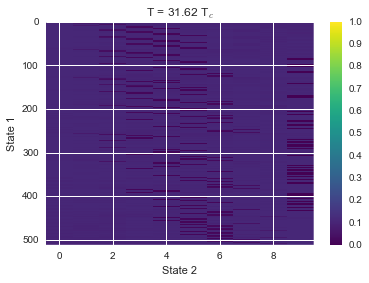

T =  100.0
(512, 512)


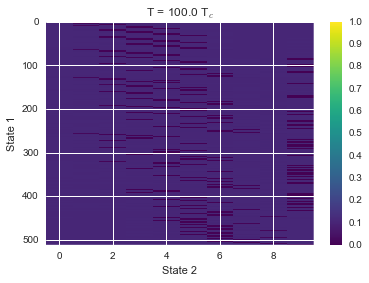

T =  316.23
(512, 512)


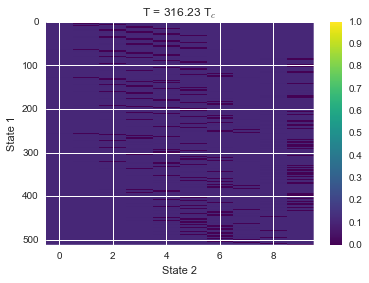

T =  1000.0
(512, 512)


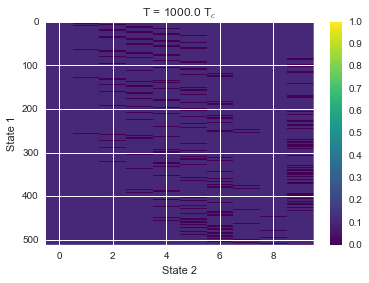

T =  3162.28
(512, 512)


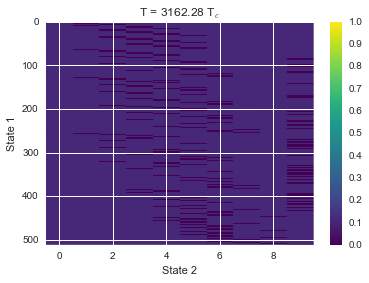

T =  10000.0
(512, 512)


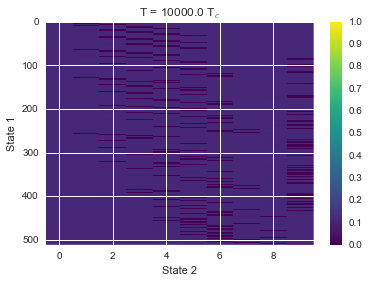

T =  31622.78
(512, 512)


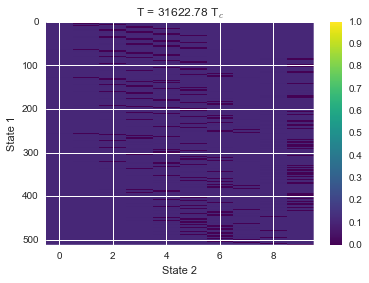

T =  100000.0
(512, 512)


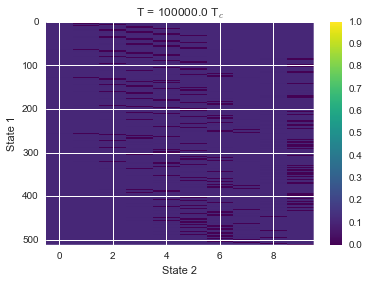

Done


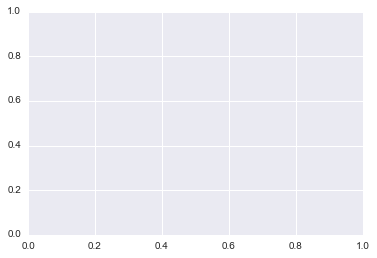

In [28]:
small_TPM = np.zeros((512,10)) # only show transitions into the 10 possible states (9 new, 1 current)

for T in T_array:
    print 'T = ', T/100
    TPM_file = '../SEMI_ANALYTIC/TPM_DATA/ANALYTIC_TPM_3x3_'+str(int(T))+'.txt'
    TPM =  pd.read_table(TPM_file,sep='\t',skiprows=[0,1,2,3],header=None)
    TPM = pd.DataFrame.transpose(TPM) # transpose so we can call TPM[row][col] like in cpp
    
    print TPM.shape
    for i in range(TPM.shape[0]):
        col_index = 0
        prob_sum = 0.
        for j in range(TPM.shape[1]):
            if TPM[i][j] > 1e-6:
                small_TPM[i][col_index] = TPM[i][j]
                prob_sum = prob_sum + TPM[i][j]
                col_index = col_index+1
        if abs(prob_sum-1.)>1e-5:
            print 'TRANSITION PROB = ',prob_sum
            
            
        
    plt.imshow(small_TPM,aspect='auto',alpha=1.0,vmin=0.00,vmax=1.0,interpolation='none',cmap='viridis')
    plt.colorbar()
    plt.title(r'T = '+str(T/100.)+' T$_c$')
    plt.xlabel('State 2')
    plt.ylabel('State 1')
    #plt.savefig('3x3_TPM_VISUALS/small_T_'+str(T/100.)+'.pdf')
    plt.show()
    plt.cla()
    

    
print 'Done'

## Hotter models have more uniform future distributions